In [1]:
# Import required libraries and modules

import os,time,logging,collections,math,itertools
import sklearn
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.sparse
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from datetime import datetime as dt
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [2]:
# Import datasets downloaded from Kaggle

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
store = pd.read_csv("stores.csv")
feature = pd.read_csv("features.csv")

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
data = pd.merge(train,feature, on=['Store','Date', 'IsHoliday'], how='inner')

In [6]:
data.shape

(421570, 14)

In [7]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [8]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [9]:
# Convert date to pandas datetime object
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
# Impute missing values or NaNs with the median value of that field

data.fillna(data.median(), inplace=True)

In [11]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106


In [12]:
data_p = data.iloc[:,5:]
data_p.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
1,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
2,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
3,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
4,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106


In [13]:
# Remove outliers

feature_outliers  = []

# For each feature find the data points with extreme high or low values
for feature in data_p.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data_p[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data_p[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)
    display(data_p[~((data_p[feature] >= Q1 - step) & (data_p[feature] <= Q3 + step))])
    feature_outliers.append(data_p[~((data_p[feature] >= Q1 - step) & (data_p[feature] <= Q3 + step))].index)

# Flatten list of outliers from each iteration of the loop above
outliers_flattened = [index for feature in feature_outliers for index in feature]
# Count the number of features for which a given observation is considered an outlier
from collections import Counter
outlier_count = Counter(outliers_flattened)
# Drop observations that are an outlier in 3 or more dimensions of the feature-space
outliers = [observation for observation in outlier_count.elements() if outlier_count[observation] >= 2]

# Remove the outliers, if any were specified
good_data = data_p.drop(data_p.index[outliers]).reset_index(drop = True)

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
62553,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818
62554,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818
62555,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818
62556,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818
62557,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818
62558,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818
62559,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818
62560,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818
62561,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818
62562,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
6587,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6588,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6589,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6590,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6591,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6592,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6593,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6594,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6595,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6596,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
6587,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6588,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6589,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6590,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6591,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6592,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6593,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6594,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6595,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6596,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
6587,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6588,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6589,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6590,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6591,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6592,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6593,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6594,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6595,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6596,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
6587,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6588,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6589,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6590,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6591,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6592,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6593,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6594,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6595,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6596,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
6587,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6588,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6589,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6590,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6591,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6592,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6593,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6594,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6595,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6596,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
37630,67.69,3.864,11341.17,192.00,73.38,5677.89,7821.95,131.037548,4.308
37631,67.69,3.864,11341.17,192.00,73.38,5677.89,7821.95,131.037548,4.308
37632,67.69,3.864,11341.17,192.00,73.38,5677.89,7821.95,131.037548,4.308
37633,67.69,3.864,11341.17,192.00,73.38,5677.89,7821.95,131.037548,4.308
37634,67.69,3.864,11341.17,192.00,73.38,5677.89,7821.95,131.037548,4.308
37635,67.69,3.864,11341.17,192.00,73.38,5677.89,7821.95,131.037548,4.308
37636,67.69,3.864,11341.17,192.00,73.38,5677.89,7821.95,131.037548,4.308
37637,67.69,3.864,11341.17,192.00,73.38,5677.89,7821.95,131.037548,4.308
37638,67.69,3.864,11341.17,192.00,73.38,5677.89,7821.95,131.037548,4.308
37639,67.69,3.864,11341.17,192.00,73.38,5677.89,7821.95,131.037548,4.308


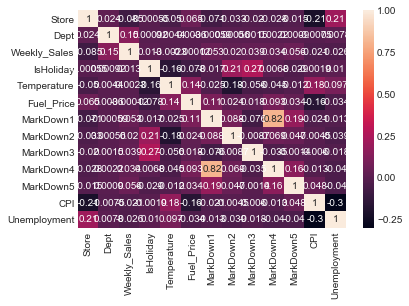

In [14]:
# Plot heatmap for each pair of features in the data
sns.heatmap(data.corr(), annot=True)

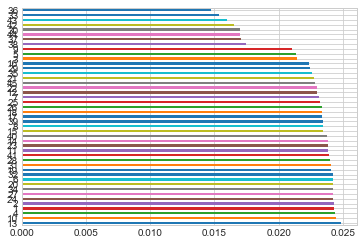

In [15]:
data['Store'].value_counts(normalize=True).plot(kind = 'barh')

In [16]:
def is_holiday(ele):
    if 'False' in ele:
        return 1
    else:
        return 0

In [17]:
# data['IsHoliday'] = is_holiday(data.IsHoliday)
data.IsHoliday = data.IsHoliday.astype(int)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106


In [19]:
# Extract date features
data['Date_dayofweek'] = data['Date'].dt.dayofweek
data['Date_month'] = data['Date'].dt.month
data['Date_year'] = data['Date'].dt.year
data['Date_day'] = data['Date'].dt.day

In [20]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,4,2,2010,5
1,1,2,2010-02-05,50605.27,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,4,2,2010,5
2,1,3,2010-02-05,13740.12,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,4,2,2010,5
3,1,4,2010-02-05,39954.04,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,4,2,2010,5
4,1,5,2010-02-05,32229.38,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,4,2,2010,5


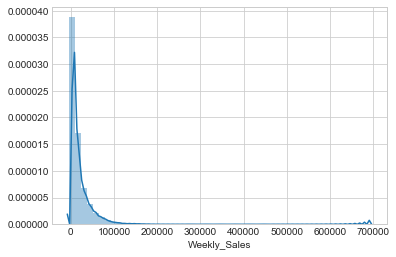

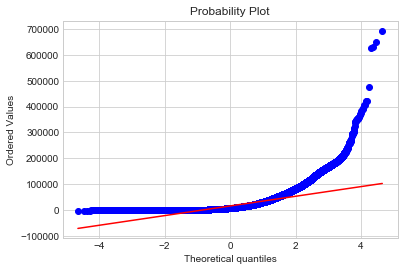

In [25]:
#histogram and normal probability plot
sns.distplot(data['Weekly_Sales']); #, fit=norm);
fig = plt.figure()
res = stats.probplot(data['Weekly_Sales'], plot=plt)